In [1]:
import os
import pandas as pd
from sympy import symbols, Eq, solve
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, savgol_filter
from scipy.optimize import curve_fit
import seaborn as sns
from matplotlib.collections import PathCollection

params_dict = {
    'font.size' : 12,
    'axes.labelsize': 'medium',
    'xtick.top' : True,
    'ytick.right' : True,
    'axes.labelsize' : 16,
    'xtick.labelsize' : 14,
    'ytick.labelsize' : 14,
    'xtick.top' : True,
    'ytick.right' : True,
    'xtick.direction' : 'in',
    'ytick.direction' : 'in',
    'legend.frameon' : True,
    'svg.fonttype' : 'none',
    'pdf.fonttype' : 42,
    'savefig.transparent' : True
}
plt.rcParams.update(params_dict)
save_dir = os.path.join(os.getcwd(), 'figs_python')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
print(f' Figures will be saved in this folder:\n {save_dir}')

 Figures will be saved in this folder:
 c:\Users\bipradha\Desktop\nontopo_analys\figs_python


In [3]:
xl_path = r'C:\Users\bipradha\Desktop\nontopo_analys\20nm\QD\x283-y491-l63-w80-a0d-f0-f2474_n2v_processed.xlsx'
df = pd.read_excel(xl_path)
df.head()

,f_528_noLoop,f_529_noLoop,f_530_noLoop,f_532_noLoop,f_533_noLoop,f_534_noLoop,f_539_noLoop,f_544_noLoop,f_559_Loop,f_563_Loop,...,f_720_passed,f_722_passed,f_724_passed,f_729_passed,f_730_passed,f_731_passed,f_734_passed,f_735_passed,f_748_passed,f_754_passed
0,36610.0,28175.0,30981.0,26655.0,27319.0,42525.0,23520.0,40875.0,26642.0,24872.0,...,46157.0,19326.0,30520.0,48026.0,41294.0,11056.0,51236.0,39240.0,19746.0,32420.0
1,27393.0,29211.0,23772.0,14383.0,28024.0,40555.0,13748.0,24141.0,27185.0,18901.0,...,29588.0,10715.0,23043.0,36060.0,41576.0,6653.0,31546.0,29078.0,8171.0,31542.0
2,27114.0,26115.0,24436.0,31724.0,32051.0,33183.0,23777.0,39122.0,24038.0,27794.0,...,27192.0,12970.0,26310.0,26859.0,44803.0,9491.0,26677.0,26004.0,6418.0,28070.0
3,23367.0,27321.0,35898.0,41100.0,23445.0,20723.0,25602.0,22291.0,15600.0,25459.0,...,34470.0,17885.0,24751.0,16887.0,46980.0,18091.0,26361.0,31862.0,12775.0,19764.0
4,27226.0,38982.0,39818.0,34337.0,16630.0,21195.0,15444.0,19442.0,14404.0,27883.0,...,41920.0,23779.0,25147.0,12018.0,43608.0,23382.0,26402.0,32079.0,19040.0,18979.0


In [4]:
def get_max_peak(line1d, smooth_length=7, peak_width=1):
    prominence_min = 1/2
    line1d_smth = savgol_filter(line1d, window_length=smooth_length, polyorder=1)
    peaks, properties = find_peaks(line1d_smth,
            prominence=(None, None), width=peak_width) #min(line1d_smth), width=(pix_rad, 3*pix_rad)
    prom_bool = properties['prominences']==max(properties['prominences'])# > (prominence_min * max(line1d_smth))
    prominences = properties['prominences'][prom_bool]
    peaks_sel = peaks[prom_bool][0]
    x_vals = np.arange(1, len(line1d_smth)+1)
    x_vals -= peaks_sel
    result = {
        'x_vals': x_vals,
        'line1d_smth': line1d_smth,
        'peaks_sel': peaks_sel,
        'peak max' : line1d_smth[peaks_sel]

    }
    return result

# line1d = df['f_386_noLoop'].dropna().values
# res = get_max_peak(line1d)
# max_val = res['peak max']
# plt.plot(res['x_vals'], line1d, label=f'max: {max_val}')
# plt.plot(0, max_val, 'o')
# plt.legend();

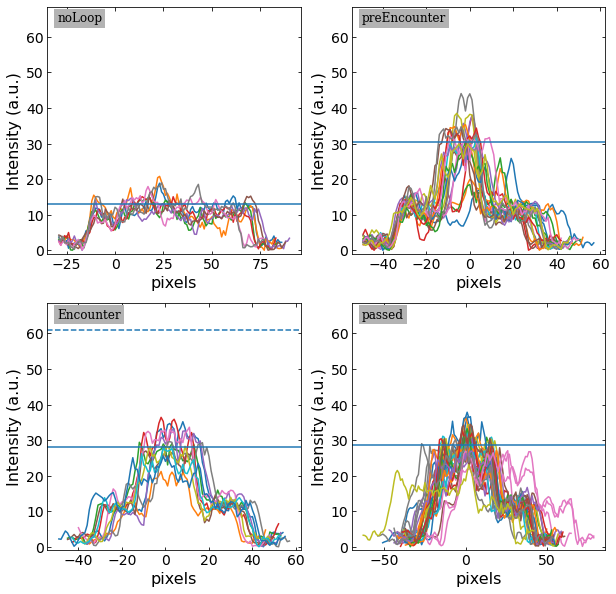

In [8]:
cols_noLoops = list(df.columns[df.columns.str.contains('_noLoop')])
cols_Loops = list(df.columns[df.columns.str.contains('_Loop')])
cols_Encounter = list(df.columns[df.columns.str.contains('_Encounter')])
cols_passed	 = list(df.columns[df.columns.str.contains('_passed')])
import matplotlib.transforms as mtransforms

fig, axs = plt.subplot_mosaic([['noLoop', 'preEncounter'], ['Encounter', 'passed']], figsize=(10,10))
norm_fact = 10000
idx_norm = 10
idx_avg = 10
correct_xpos = True
text_annotate = False

avg_list = []
for col in  cols_noLoops:
    # line1d = norm_fact * df[col]/df[col].max()
    line1d = df[col]/norm_fact
    line1d = line1d#/8
    x_vals = -30 + np.arange(1, len(line1d)+1)
    _axis = axs['noLoop']
    _axis.plot(x_vals, line1d)
    max_pos = line1d.idxmax()
    avg_list.append(line1d[max_pos-idx_avg:max_pos+idx_avg].mean())
    if text_annotate:
        _axis.text(x_vals[max_pos], max(line1d), col)
avg_noLoop = np.mean(avg_list)
_axis.axhline(avg_noLoop)

idx_avg = int(idx_avg/4)
avg_list = []
for col in  cols_Loops:
    # line1d = norm_fact * df[col]/df[col].max()
    line1d = df[col]/norm_fact
    x_vals = -30 + np.arange(1, len(line1d)+1)
    if correct_xpos:
        res = get_max_peak(line1d)
        x_vals = res['x_vals']
    # axs['preEncounter'].plot(x_vals, line1d)
    _axis = axs['preEncounter']
    _axis.plot(x_vals, line1d)
    max_pos = line1d.idxmax()
    avg_list.append(line1d[max_pos-idx_avg:max_pos+idx_avg].mean())
    if text_annotate:
        _axis.text(x_vals[max_pos], max(line1d), col)
avg_preEnc = np.mean(avg_list)
_axis.axhline(avg_preEnc)
# _axis.axhline(2 * avg_noLoop, ls='--')

avg_list = []
for col in  cols_Encounter:
    # line1d = norm_fact * df[col]/df[col].max()
    line1d = df[col]/norm_fact
    x_vals = -30 + np.arange(1, len(line1d)+1)
    if correct_xpos:
        res = get_max_peak(line1d)
        x_vals = res['x_vals']
    # axs['Encounter'].plot(x_vals, line1d)
    _axis = axs['Encounter']
    _axis.plot(x_vals, line1d)
    max_pos = line1d.idxmax()
    avg_list.append(line1d[max_pos-idx_avg:max_pos+idx_avg].mean())
    if text_annotate:
        _axis.text(x_vals[max_pos], max(line1d), col)
_axis.axhline(np.mean(avg_list))
_axis.axhline(2 * avg_preEnc, ls='--')

avg_list = []
for col in  cols_passed:
    # line1d = norm_fact * df[col]/df[col].max()
    line1d = df[col]/norm_fact
    x_vals = -30 + np.arange(1, len(line1d)+1)
    if correct_xpos:
        res = get_max_peak(line1d)
        x_vals = res['x_vals']
    # axs['passed'].plot(x_vals, line1d)
    _axis = axs['passed']
    _axis.plot(x_vals, line1d)
    max_pos = line1d.idxmax()
    avg_list.append(line1d[max_pos-idx_avg:max_pos+idx_avg].mean())
    if text_annotate:
        _axis.text(x_vals[max_pos], max(line1d), col)
_axis.axhline(np.mean(avg_list))
# _axis.axhline(2 * avg_noLoop, ls='--')

for label, ax in axs.items():
    # label physical distance in and down:
    trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='medium', verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='0.7', edgecolor='none', pad=3.0))
    ax.set_xlabel('pixels')
    ax.set_ylabel('Intensity (a.u.)')
    ax.set_ylim(-1, 2.25 * avg_preEnc)
plt.savefig(os.path.join(save_dir, 'SIFig10_lineprofiles.svg'))

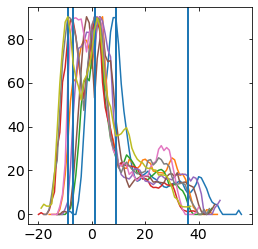

In [5]:
fig, axs = plt.subplot_mosaic([['Encounter']], figsize=(4,4))
cols_Encounter = list(df.columns[df.columns.str.contains('_Encounter')])

loop_pos_width = 8
dna_leftend_pos = -10
dna_rightend_pos = 35
norm_fact = 90
correct_xpos = True
loop_int_list = []
dna_int_outside_list = []
for col in  cols_Encounter:
    line1d = norm_fact * df[col]/df[col].max()
    x_vals = -30 + np.arange(1, len(line1d)+1)

    if correct_xpos:
        res = get_max_peak(line1d)
        x_vals = res['x_vals']
        df_temp = pd.DataFrame({'x_vals': x_vals, 'intensity' : line1d})
        axs['Encounter'].axvline(x=1)
        axs['Encounter'].axvline(x=1-loop_pos_width)
        axs['Encounter'].axvline(x=1+loop_pos_width)
        axs['Encounter'].axvline(x=1+dna_leftend_pos)
        axs['Encounter'].axvline(x=1+dna_rightend_pos)
        df_loop_int = df_temp.loc[(df_temp['x_vals']>1-loop_pos_width) & (df_temp['x_vals']<1+loop_pos_width)]
        loop_int = df_loop_int['intensity'].sum()
        df_dna_int = df_temp.loc[(df_temp['x_vals']>dna_leftend_pos) & (df_temp['x_vals']<dna_rightend_pos)]
        dna_int_mean = df_dna_int['intensity'].values[:-dna_leftend_pos-loop_pos_width].mean()
        loop_int = loop_int - 2*loop_pos_width*dna_int_mean
        dna_int_outside = df_dna_int['intensity'].sum() - loop_int
        loop_int_list.append(loop_int)
        dna_int_outside_list.append(dna_int_outside)
    axs['Encounter'].plot(x_vals, line1d)

loop_int_list = np.array(loop_int_list)
dna_int_outside_list = np.array(dna_int_outside_list)

In [6]:
loop_sizes = 48.5 * loop_int_list/(dna_int_outside_list+loop_int_list)
print(f'loop sizes: {loop_sizes}')
print(f'Mean loop sizes: {loop_sizes.mean()} +- {loop_sizes.std()}')

loop sizes: [ 27.36085945  10.01112563  29.17561711 -11.46914827  26.88031984
  31.52908402  -0.39468314 -11.37480105 -10.94988715]
Mean loop sizes: 10.0853873823786 +- 17.895494624140632


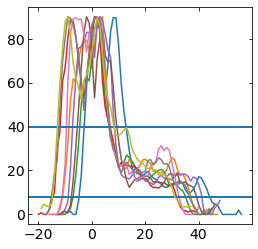

In [7]:
fig, axs = plt.subplot_mosaic([['Encounter']], figsize=(4,4))
cols_Encounter = list(df.columns[df.columns.str.contains('_Encounter')])

loop_threshold = 40
dna_threshold = 8
norm_fact = 90
correct_xpos = True
loop_int_list = []
dna_int_outside_list = []
for col in  cols_Encounter:
    line1d = norm_fact * df[col]/df[col].max()
    x_vals = -30 + np.arange(1, len(line1d)+1)

    if correct_xpos:
        res = get_max_peak(line1d)
        x_vals = res['x_vals']
        df_temp = pd.DataFrame({'x_vals': x_vals, 'intensity' : line1d})
        axs['Encounter'].axhline(y=loop_threshold)
        axs['Encounter'].axhline(y=dna_threshold)
        loop_bool = df_temp['intensity'].values > loop_threshold
        dna_bool = np.logical_and(df_temp['intensity'].values > dna_threshold,
                                  df_temp['intensity'].values < loop_threshold)
        df_loop_int = df_temp[loop_bool]
        loop_int = df_loop_int['intensity'].sum()
        df_dna_int = df_temp[dna_bool]
        dna_int_mean = df_dna_int['intensity'].mean()
        loop_int = loop_int - len(df_loop_int)*dna_int_mean
        dna_int_outside = df_dna_int['intensity'].sum() + len(df_loop_int)*dna_int_mean
        loop_int_list.append(loop_int)
        dna_int_outside_list.append(dna_int_outside)
    axs['Encounter'].plot(x_vals, line1d)

loop_int_list = np.array(loop_int_list)
dna_int_outside_list = np.array(dna_int_outside_list)

In [8]:
loop_sizes = 48.5 * loop_int_list/(dna_int_outside_list+loop_int_list)
print(f'loop sizes: {loop_sizes}')
print(f'Mean loop sizes: {loop_sizes.mean()} +- {loop_sizes.std()}')

loop sizes: [25.07895583 20.06128293 18.49906257 24.64066126 24.9447601  24.26084257
 23.53991444 23.47756889 21.30588507]
Mean loop sizes: 22.867659296256353 +- 2.2239133886944034


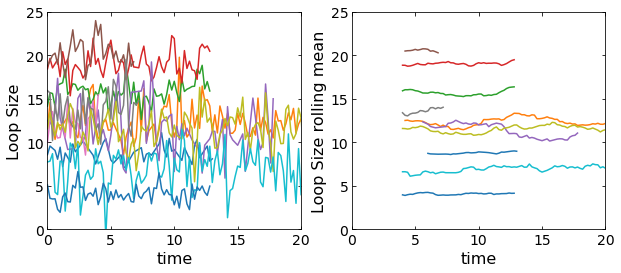

In [10]:
msd_loop_folder = 'sample_data/msd_loopsizes/'
msd_loop_filelist = []
for root, dirs, files in os.walk(msd_loop_folder):
    for file in files:
        if file.endswith(".csv"):
            msd_loop_filelist.append(os.path.join(root, file))
from matplotlib.lines import Line2D
markers = [ '+', '*', ',', 'o', '.', '1', 'p']
markers = list(Line2D.markers.keys())

fig, axs = plt.subplot_mosaic([['loopsize', 'loopsize_sm']], figsize=(10,4))
for idx, file in enumerate(msd_loop_filelist):
    df = pd.read_csv(file)
    _size = df['loopsize'].values
    axs['loopsize'].plot(df['time']-df['time'].min(), _size)
    axs['loopsize_sm'].plot(df['time']-df['time'].min(),
                            df['loopsize'].rolling(21).mean())
    from scipy.signal import savgol_filter
    _size = savgol_filter(_size, 21, 1)
    # axs['loopsize_sm'].plot(df['time']-df['time'].min(), _size, markers[idx], ms=3)
axs['loopsize'].set_xlabel('time')
axs['loopsize'].set_ylabel('Loop Size')

axs['loopsize_sm'].set_xlabel('time')
axs['loopsize_sm'].set_ylabel('Loop Size rolling mean')
# axs['loopsize_sm'].set_xscale('log')

axs['loopsize'].set_xlim(0, 20)
axs['loopsize_sm'].set_xlim(0, 20)

axs['loopsize'].set_ylim(0, 25)
axs['loopsize_sm'].set_ylim(0, 25)

plt.savefig(os.path.join(save_dir, 'msd_vs_loopsize.svg'))